In [1]:
# !pip install pydot

## Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, SimpleRNN, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import Sequential, Model, load_model


import sklearn.metrics as metrics 
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("./EEG_data.csv")

In [4]:
df1.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [5]:
# df1 = df1.loc[df1['VideoID'] == 9]

In [6]:
# df1.head()

In [7]:
df2 = pd.read_csv("./demographic_info.csv")

In [8]:
df2.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


## Preprocessing

### Rename column 'subject ID' in df2 to 'SubjectID' so that we can perform inner join.

In [9]:
df2 = df2.rename(columns = {'subject ID': 'SubjectID'})

### Perform Inner join

In [10]:
df = pd.merge(df1, df2, on='SubjectID', how='inner')

In [11]:
df.shape

(12811, 18)

In [12]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### Perform one-hot encoding for categorical values

In [13]:
df = pd.get_dummies(df)

In [14]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


### Converting the Categorical columns to numerical columns

In [15]:
# df['gender'].unique()

In [16]:
# df['ethnicity'].unique()

In [17]:
# df['gender'] = df['gender'].replace({'M':1, 'F':0})
# df['ethnicity'] = df['ethnicity'].replace({'Han Chinese':0, 'Bengali':1, 'English':2})

In [18]:
# df.head()

### Drop the columns 'SubjectID', 'VideoID', 'predefinedlabel' as they are not useful in predictions

In [19]:
df.drop(columns = ['SubjectID','VideoID','predefinedlabel'],inplace=True)

In [20]:
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,0,0,1,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,0,0,1,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,0,0,1,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,0,0,1,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,0,0,1,0,1


### Seperate x and y

In [21]:
y = df['user-definedlabeln']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: user-definedlabeln, dtype: float64

In [22]:
df.drop(columns = ['user-definedlabeln'], inplace=True)
x = df
x.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,0,0,1,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,0,0,1,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,0,0,1,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,0,0,1,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,0,0,1,0,1


In [23]:
# x.drop(columns = [' age'], inplace=True)
# x.head()

# ['Raw', 'Delta', 'Theta', 'Attention', 'Mediation', 'Alpha1', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', ' gender_F', ' gender_M', 
#        ' ethnicity_Bengali',' ethnicity_English',' ethnicity_Han Chinese', ' age']

### Train-Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9608, 17)
(9608,)
(3203, 17)
(3203,)


/home/sai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user-definedlabeln', ylabel='count'>

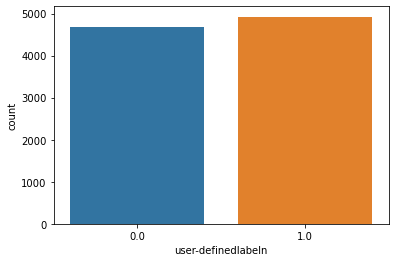

In [26]:
sns.countplot(y_train)

In [27]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(x_train)

test_x_scaled = scaler.transform(x_test)

# train_x_scaled = x_train
# test_x_scaled = x_test

## Models

In [28]:
f = len(x_train.columns)
print(f)

17


### Neural Networks

In [29]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(f,)),
#     keras.layers.Dense(32, activation=tf.nn.relu),
#     keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dense(8, activation=tf.nn.relu),
#     keras.layers.Dense(4, activation=tf.nn.relu),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])

In [30]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(train_x_scaled, y_train, epochs=2, batch_size=1)

In [31]:
# test_loss, test_acc = model.evaluate(test_x_scaled, y_test)
# print('Test accuracy:', test_acc)

### LSTM

**Defining layers in the architecture**

In [2]:
# f = 17

In [3]:
inputs = Input(shape=(f,1))

dense = Dense(64, activation = 'relu')(inputs)

lstm_0=  Bidirectional(LSTM(256, return_sequences = True, dropout=0.3))(dense)
# Dense0 = Dense(256, activation = 'relu')(lstm_0)

lstm_1=  Bidirectional(LSTM(128, return_sequences = True, dropout=0.3))(lstm_0)
# Dense1 = Dense(1024, activation = tf.nn.relu)(lstm_1)

# rnn = SimpleRNN(256, return_sequences = True, dropout=0.2)(dense)
# rnn_1 = SimpleRNN(128, return_sequences = True, dropout=0.2)(rnn)

# lstm_2=  Bidirectional(LSTM(128, return_sequences = True, dropout=0.3))(lstm_1)
# Dense2 = Dense(256, activation = tf.nn.relu)(lstm_2)

# lstm_3=  Bidirectional(LSTM(128, return_sequences = True, dropout=0.3))(Dense2)
# Dense3 = Dense(64, activation = tf.nn.relu)(lstm_3)

flat = Flatten()(lstm_1)

Dense_3 = Dense(128, activation = tf.nn.relu)(flat)
outputs = Dense(1, activation=tf.nn.sigmoid)(Dense_3)

model = tf.keras.Model(inputs, outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17, 1)]           0         
                                                                 
 dense (Dense)               (None, 17, 64)            128       
                                                                 
 lstm (LSTM)                 (None, 17, 128)           98816     
                                                                 
 lstm_1 (LSTM)               (None, 17, 256)           394240    
                                                                 
 lstm_2 (LSTM)               (None, 17, 128)           197120    
                                                                 
 flatten (Flatten)           (None, 2176)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               278656

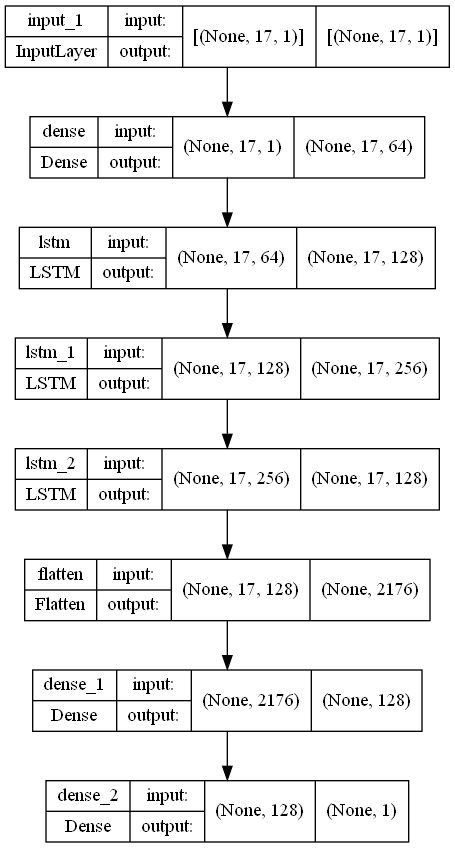

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
es = EarlyStopping(monitor='val_loss',
                   min_delta= 0.001, 
                   patience=10, 
                   verbose=1, 
                   mode='min'
                  )

In [35]:
mc = ModelCheckpoint('./lstm_model.h5', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True
                    )

In [36]:
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

**Compiling and fitting the model**

In [37]:
model.compile(optimizer='adam',
              loss=['binary_crossentropy'],
              metrics=['accuracy']
             )

In [38]:
epocs = 50

history = model.fit(train_x_scaled,y_train,
                    batch_size=10,
                    epochs=epocs,
                    verbose=2,
                    validation_data=(test_x_scaled,y_test),
                    callbacks=[es,mc] #,lr_schedule]
                   )

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.57883, saving model to ./lstm_model.h5
961/961 - 89s - loss: 0.6731 - accuracy: 0.5832 - val_loss: 0.6810 - val_accuracy: 0.5788 - 89s/epoch - 93ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.57883 to 0.62223, saving model to ./lstm_model.h5
961/961 - 69s - loss: 0.6504 - accuracy: 0.6238 - val_loss: 0.6455 - val_accuracy: 0.6222 - 69s/epoch - 72ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.62223
961/961 - 66s - loss: 0.6414 - accuracy: 0.6316 - val_loss: 0.6505 - val_accuracy: 0.6207 - 66s/epoch - 69ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.62223 to 0.64689, saving model to ./lstm_model.h5
961/961 - 63s - loss: 0.6317 - accuracy: 0.6463 - val_loss: 0.6254 - val_accuracy: 0.6469 - 63s/epoch - 65ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.64689 to 0.65251, saving model to ./lstm_model.h5
961/961 - 66s - loss: 0.6167 - accuracy: 0.6558 - val_loss: 0.6191 - val_accuracy: 0

**Finding the accuracy of test-data**

In [39]:
# test_loss, test_acc = model.evaluate(test_x_scaled, y_test)
# print('\nTest accuracy:', test_acc)

In [40]:
model = load_model('./lstm_model.h5')

In [41]:
test_loss, test_acc = model.evaluate(test_x_scaled, y_test)
print('\nTest accuracy:', test_acc)

101/101 [==============================] - 4s 30ms/step - loss: 0.5997 - accuracy: 0.6940

Test accuracy: 0.6940368413925171


**Plotting the loss and accuracy changes over time**

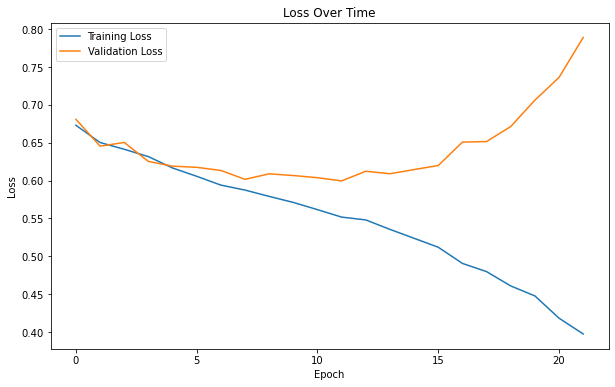

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

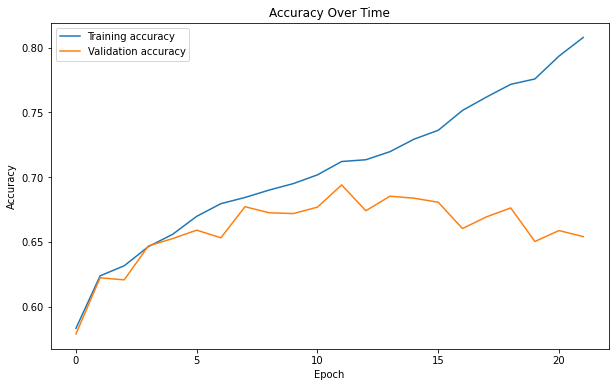

In [43]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Time")
plt.legend()

plt.show()

**Confusion Matrix**

In [44]:
y_hat = model.predict(test_x_scaled)

In [45]:
y_hat.shape

(3203, 1)

In [46]:
y_hat

array([[0.4375761 ],
       [0.79826427],
       [0.7778414 ],
       ...,
       [0.9404024 ],
       [0.5206909 ],
       [0.28001764]], dtype=float32)

In [47]:
yhat = np.array(y_hat >= 0.5, dtype = int)

In [48]:
yhat.shape

(3203, 1)

In [49]:
yhat

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [50]:
y_test.shape

(3203,)

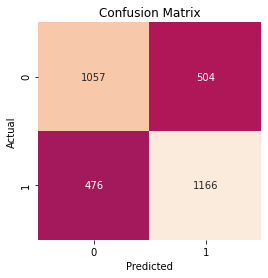

In [51]:
cm = confusion_matrix(y_test, yhat)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [52]:
cm

array([[1057,  504],
       [ 476, 1166]])

#### Classification report

In [53]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68      1561
         1.0       0.70      0.71      0.70      1642

    accuracy                           0.69      3203
   macro avg       0.69      0.69      0.69      3203
weighted avg       0.69      0.69      0.69      3203



### References

https://www.pluralsight.com/guides/deep-learning-model-perform-binary-classification

1) https://www.tensorflow.org/api_docs/python/tf/keras/callbacks  
2) https://www.tensorflow.org/api_docs/python/tf/keras/layers

3) https://www.tensorflow.org/text/tutorials/text_classification_rnn

4) https://www.kaggle.com/code/shreyaspj/confused-student-eeg-prediction